<a href="https://colab.research.google.com/github/Nadda1004/Intro_Machine_learning/blob/main/W2_D4_ML_Week2_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members:
* Nada Alzahrani
* Shaima Alamri
* Abeer Alghamdi

In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
from sklearn.metrics import *
import numpy as np
# Import what you feel is neccessary from scikit-learn


<center><H1>Adult Dataset Classification</H1></center>


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



In [2]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

# remove spaces and . in both test and training
training.target = training.target.map({" <=50K" : "<=50K"  , ' >50K':'>50K'})
test.target = test.target.map({" <=50K." : "<=50K"  , ' >50K.':'>50K'})


# Create Train # we removed the native country from the X set beacuse it created an error with the both data's shape
X_train = training.drop(["target" , "native_country"], axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop(["target" , "native_country"], axis=1)
y_test = test["target"]

In [3]:
X_train

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20


### **Determine your baseline model accuracy**

In [4]:
y_train.value_counts() # view each target value count 

<=50K    24720
>50K      7841
Name: target, dtype: int64

In [5]:
y_test.value_counts()

<=50K    12435
>50K      3846
Name: target, dtype: int64

In [6]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class ( <= 50 ))

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds # print all predicted values 

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280    <=50K
Length: 16281, dtype: object

In [7]:
baseline_preds.value_counts()

<=50K    16281
dtype: int64

In [8]:
baseline_acc = accuracy_score(y_test, baseline_preds)
baseline_acc

0.7637737239727289

### **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


In [9]:
training.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


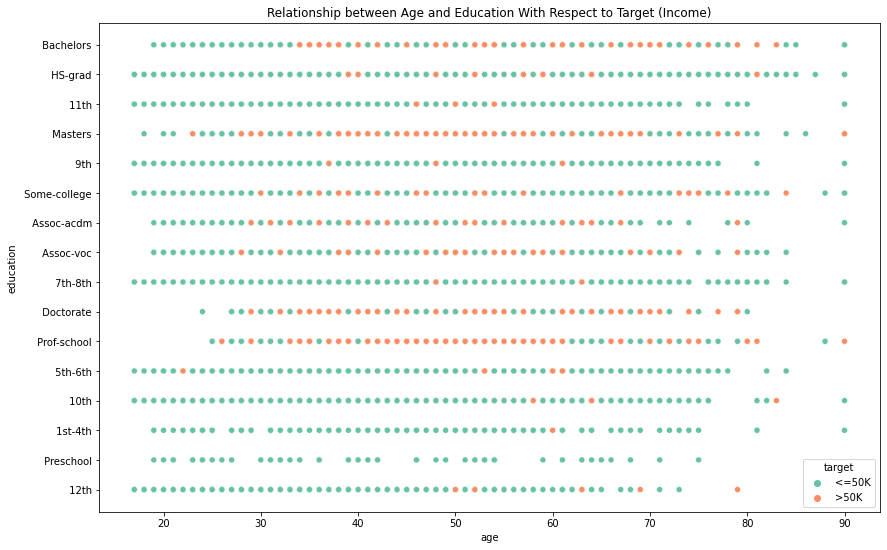

In [10]:
# relationship between education and age 
plt.figure(figsize=(14,9))
sns.scatterplot( x = 'age' , y = 'education' , hue = 'target' , data = training).set(title = 'Relationship between Age and Education With Respect to Target (Income)');

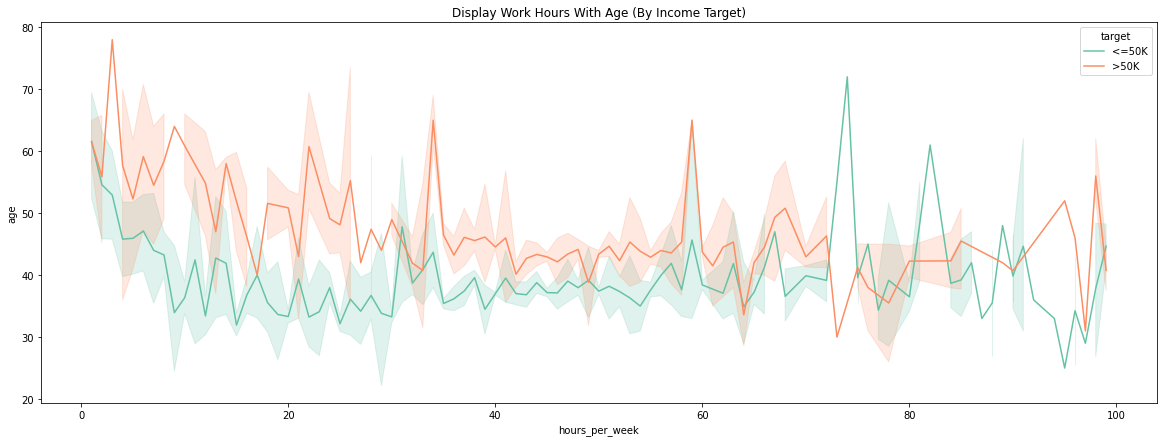

In [11]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'hours_per_week' , y = 'age' , hue = 'target', data = training).set(title = 'Display Work Hours With Age (By Income Target)');

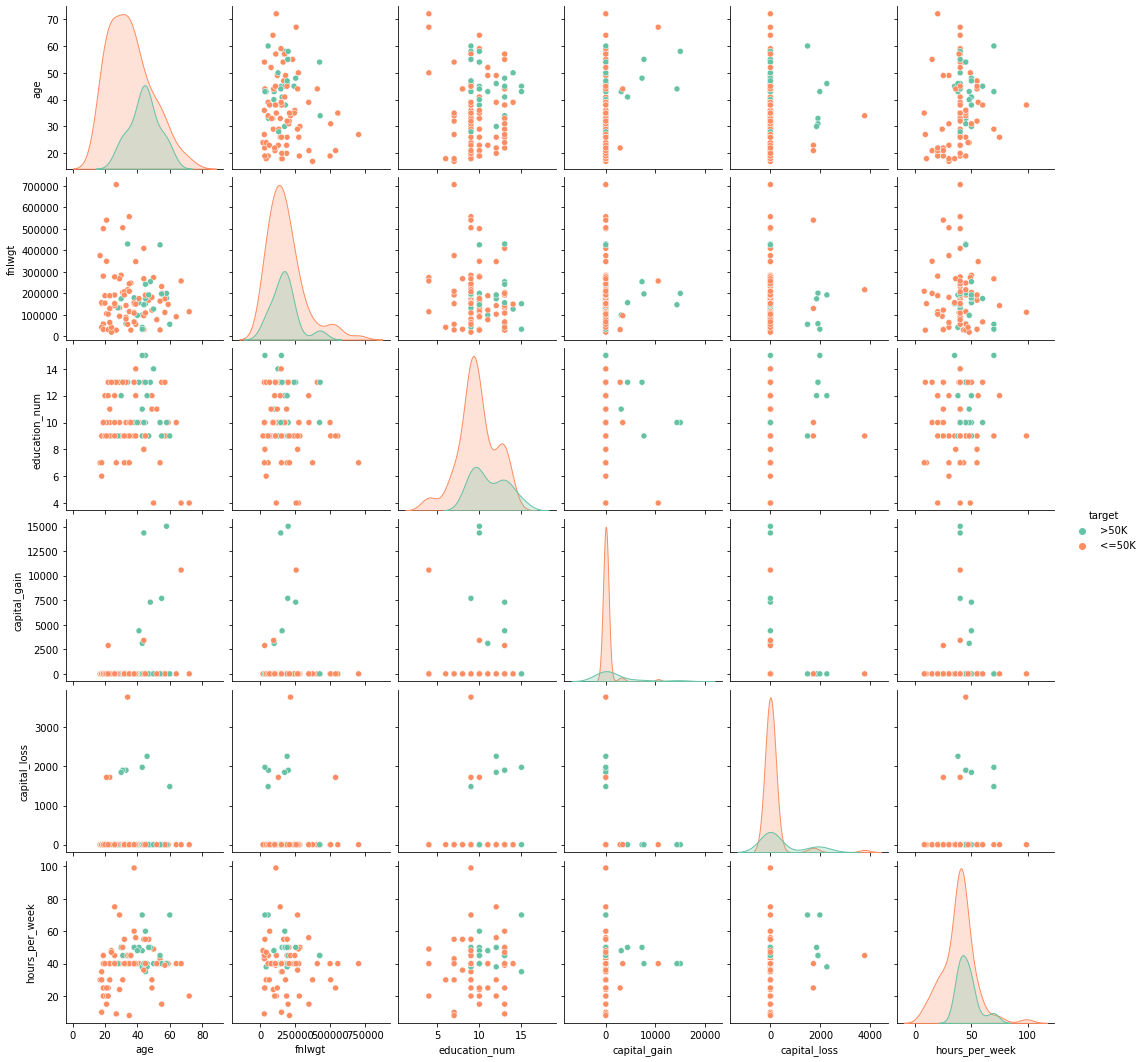

In [12]:
sns.pairplot(data=training.sample(100) , hue = 'target');

### **Clean and Preprocess your Data** (Hint: One-Hot-Encode Categoricals)
Another hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [13]:
training.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [14]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [15]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [16]:
from sklearn import preprocessing
# convert target values to 0 and 1 - binary
label_encoding = preprocessing.LabelEncoder()
y_train= label_encoding.fit_transform(y_train.astype(str))
y_test= label_encoding.fit_transform(y_test.astype(str))

In [17]:
label_encoding.classes_ # 0 -> ('<=50K') , 1 -> ('>50K')

array(['<=50K', '>50K'], dtype=object)

In [18]:
# convert sex values to 0 and 1 - binary
X_train['sex'] = label_encoding.fit_transform(X_train['sex'].astype(str))
X_test['sex'] = label_encoding.fit_transform(X_test['sex'].astype(str))

In [19]:
label_encoding.classes_ # 0 -> ('Female') , 1 -> ('Male')

array([' Female', ' Male'], dtype=object)

In [20]:
# convert Categorical values to 0 and 1 - multi in - > train set
X_train = pd.get_dummies(X_train ,columns= ["marital_status" , 'relationship' , 'workclass' , 'education' , 'ooccupation'])
X_train.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving
0,39,77516,13,1,2174,0,40,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,1,0,0,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,1,0,0,40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
# convert Categorical values to 0 and 1 - multi in - > test set
X_test = pd.get_dummies(X_test ,columns= ["marital_status" , 'relationship', 'workclass' , 'education' , 'ooccupation'])
X_test.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving
0,25,226802,7,1,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,1,0,0,50,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,0,0,0,30,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
X_test

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving
0,25,226802,7,1,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,1,0,0,50,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,0,0,0,30,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,0,36,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16277,64,321403,9,1,0,0,40,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16278,38,374983,13,1,0,0,50,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16279,44,83891,13,1,5455,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Create a kNN model** 



In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
X_test.shape , X_train.shape

((16281, 60), (32561, 60))

In [25]:
perds = knn.predict(X_test)

In [26]:
knn_acc = accuracy_score(y_test, perds)
knn_acc

0.7608869234076531

### **Show us your confusion matrix and explain the results**

In [27]:
cf = confusion_matrix(y_test, perds)
cf

array([[10949,  1486],
       [ 2407,  1439]])

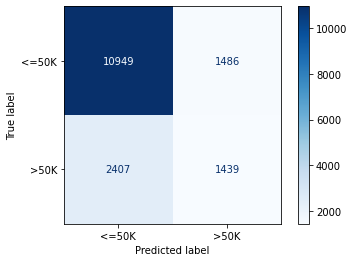

In [28]:
# 0 -> ('<=50K') , 1 -> ('>50K')
plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test, cmap='Blues', display_labels=['<=50K', '>50K']  , values_format='');

your stuff here

### **Compare to Baseline model and explain the results**

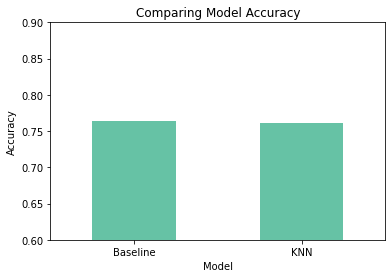

In [29]:
pd.DataFrame([baseline_acc , knn_acc]).plot.bar()
plt.xticks(np.arange(2),('Baseline','KNN'))
plt.legend().remove()
plt.ylim(0.6, 0.9)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');

In [30]:
print('Baseline = ' , baseline_acc ,  ' KNN = ',knn_acc)

Baseline =  0.7637737239727289  KNN =  0.7608869234076531




*   **As Seen above the Baseline model had a higher percentage than the KNN Model!**



---





### **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



### **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid